In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_hist_extremes
from script_utils import get_wfd_mask

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
NSIDE=64
your_username = "rjassef"
folder_mafoutput = "Color_EM5_{0:d}".format(NSIDE)
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
        bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
#Rearrange the bundleDicts_raw dictionary so that the keys are always the same as for the first run.
dbRuns = list(bundleDicts_raw.keys())
Keys = list(bundleDicts_raw[dbRuns[0]].keys())
bundleDicts = dict()
for runName in dbRuns:
    bundleDicts[runName] = dict()
    Keys_raw = bundleDicts_raw[runName]
    for Key in Keys:
        for Key_raw in Keys_raw:
            if Key[1]==Key_raw[1]:
                bundleDicts[runName][Key] = bundleDicts_raw[runName][Key_raw]

In [9]:
# check keys
bd_keys = list(bundleDicts[dbRuns[0]].keys())
print(bd_keys, len(list(bundleDicts.keys())), len(list(bundleDicts_raw.keys())))
print(Keys)

[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')] 190 190
[(1, 'Exgalm5_color_with_cuts_AGN_ug_mean'), (2, 'Exgalm5_color_with_cuts_AGN_gr_mean'), (3, 'Exgalm5_color_with_cuts_AGN_ri_mean'), (4, 'Exgalm5_color_with_cuts_AGN_iz_mean'), (5, 'Exgalm5_color_with_cuts_AGN_zy_mean')]


In [10]:
#Make sure that the plots folder exists. 
plots_folder = "plots_all_opsims_extremes_WFDonly_{0:d}".format(NSIDE)
if not os.path.exists(plots_folder):
    os.mkdir(plots_folder)

## WFD Filter

Load the WFD footprint as a mask, and add it to the mask of each run.

In [11]:
WFDfp_folder_mafoutput = "WFDfootprint_{0:d}".format(NSIDE)
WFDfp_resultDbPath = '/home/idies/workspace/Temporary/{0}/scratch/MAFOutput/{1}'.format(
    your_username, WFDfp_folder_mafoutput)
WFDfp_metricDataPath = '/home/idies/workspace/Temporary/{0}/scratch/MAFOutput/{1}/MetricData/'.format(
    your_username, WFDfp_folder_mafoutput)

In [12]:
wfd_mask = get_wfd_mask(WFDfp_folder_mafoutput, WFDfp_resultDbPath, WFDfp_metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [13]:
for run in dbRuns:
    for key in bundleDicts[run].keys():
        mask = bundleDicts[run][key].metricValues.mask
        bundleDicts[run][key].metricValues.mask = mask | wfd_mask[run]

## Assef et el. (2010) AGN template colors

In [14]:
z=2.0
from quasar_colors.quasar_colors import Assef10_colors

(1, 'Exgalm5_color_with_cuts_AGN_ug_mean')
filterdist_indx3_v1.5_10yrs -1.5802842215713042
u_long_ms_60_v1.7_10yrs -0.6187376413000205
(2, 'Exgalm5_color_with_cuts_AGN_gr_mean')
short_exp_5ns_1expt_v1.5_10yrs -0.13174052383552579
filterdist_indx1_v1.5_10yrs 0.5414105706255556
(3, 'Exgalm5_color_with_cuts_AGN_ri_mean')
filterdist_indx6_v1.5_10yrs 0.2385309319631002
footprint_bluer_footprintv1.5_10yrs 0.5148244787560354
(4, 'Exgalm5_color_with_cuts_AGN_iz_mean')
filterdist_indx5_v1.5_10yrs 0.32645265495772857
filterdist_indx6_v1.5_10yrs 0.7260529721955445
(5, 'Exgalm5_color_with_cuts_AGN_zy_mean')
twilight_neo_mod1_v1.5_10yrs 0.5069316155659314
var_expt_v1.5_10yrs 1.0036609618829369


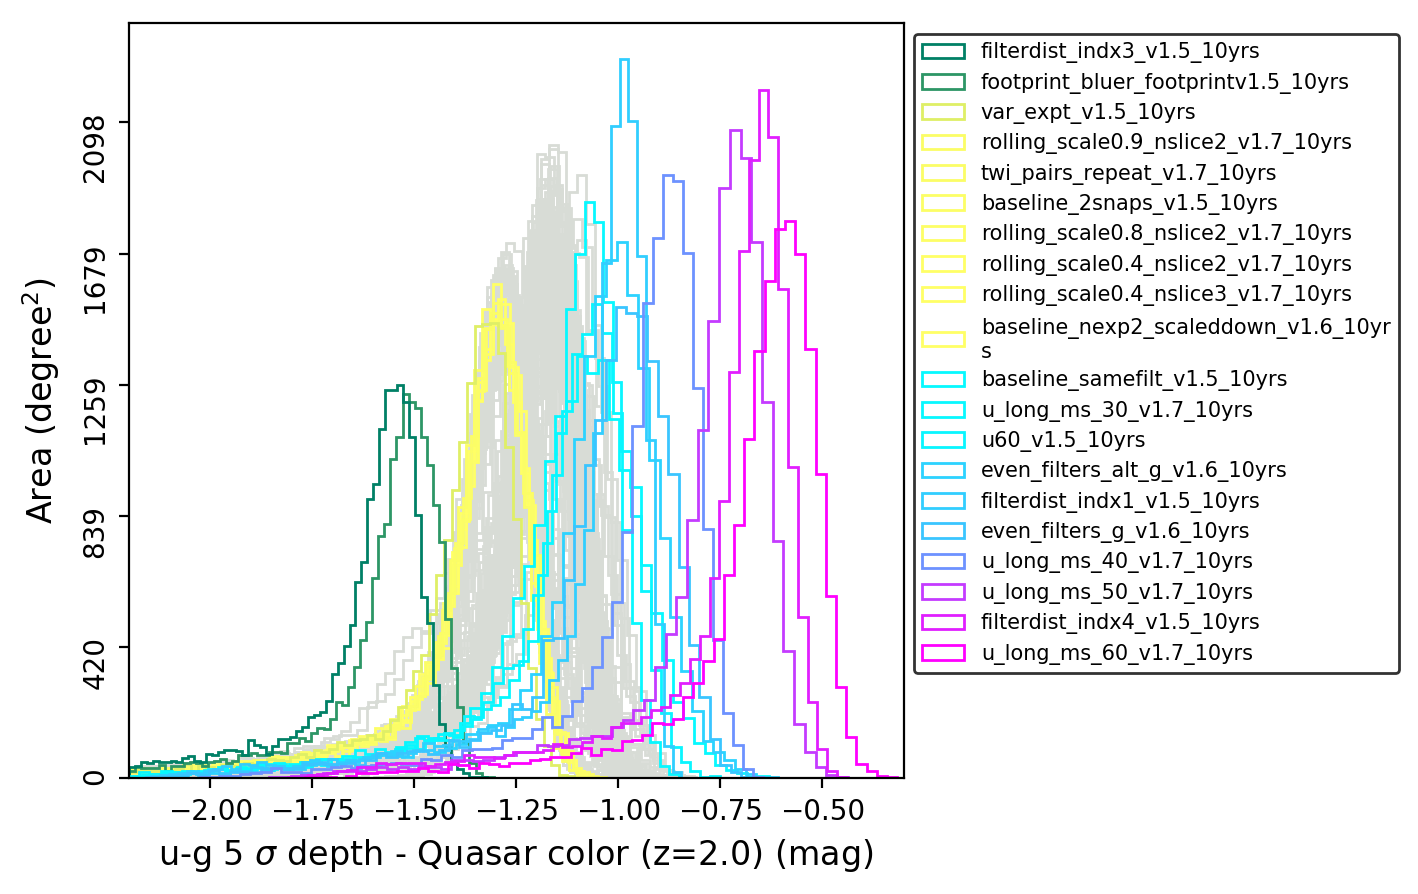

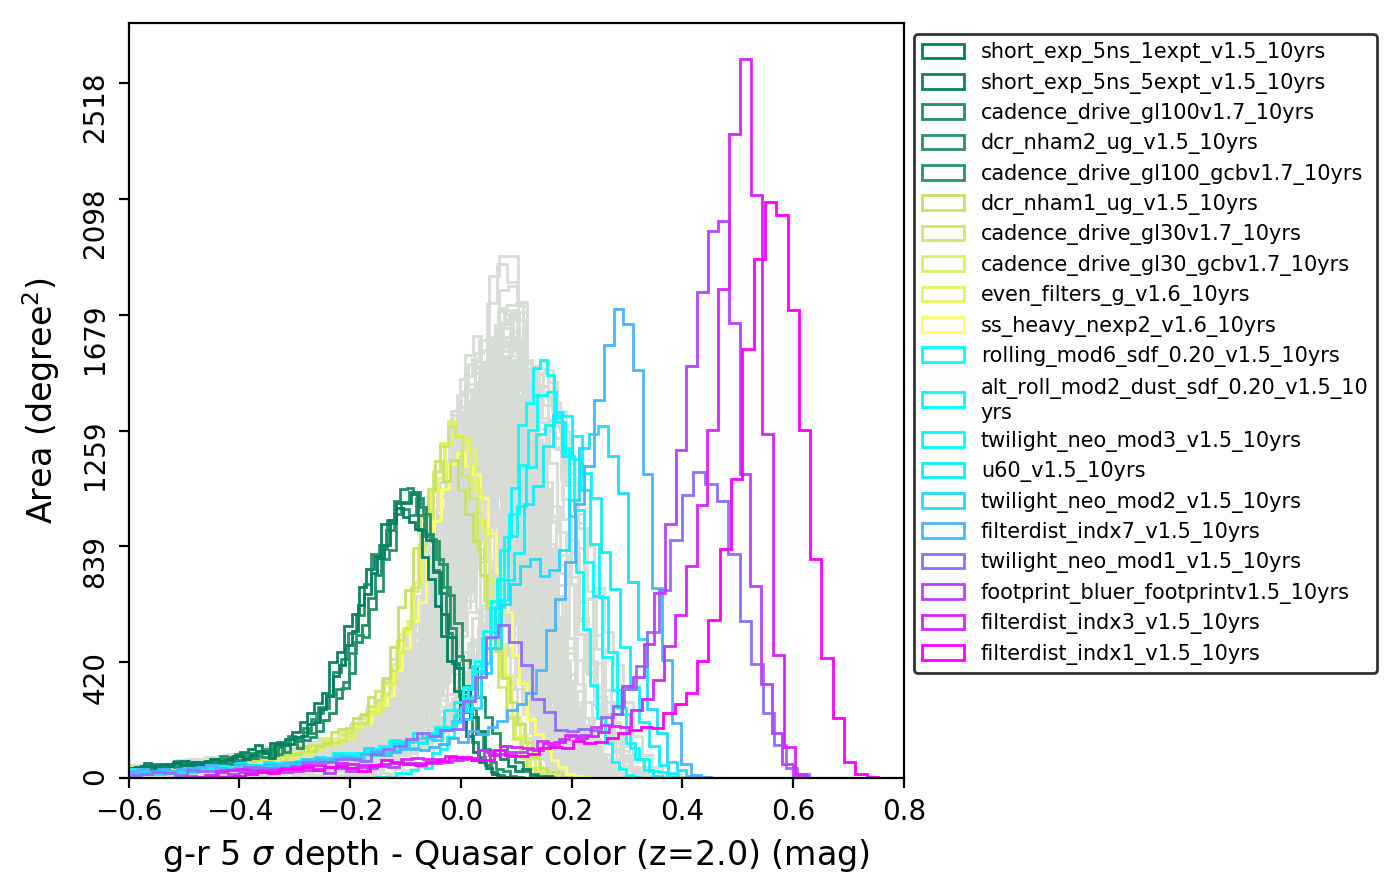

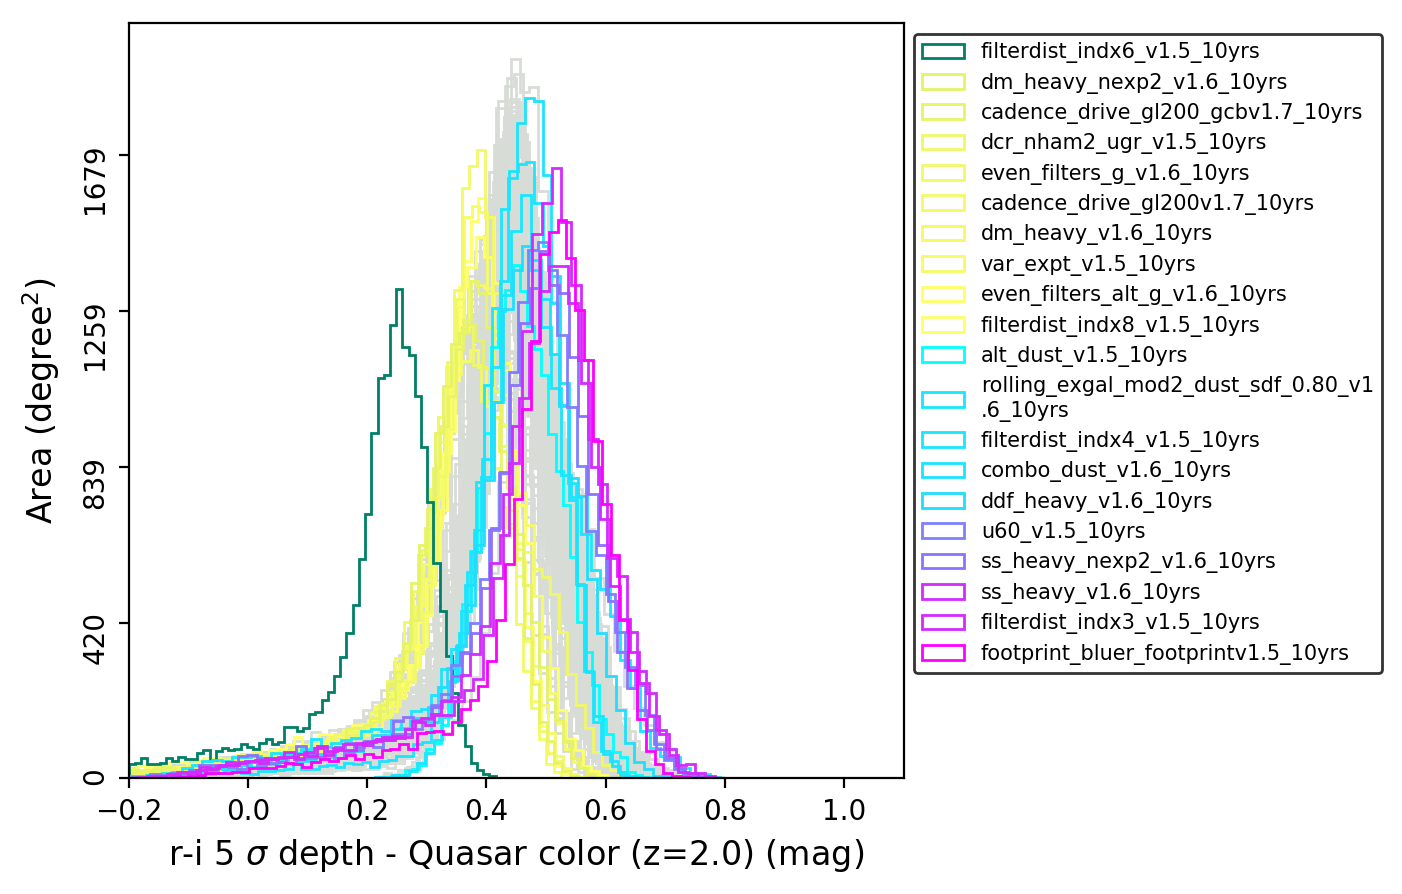

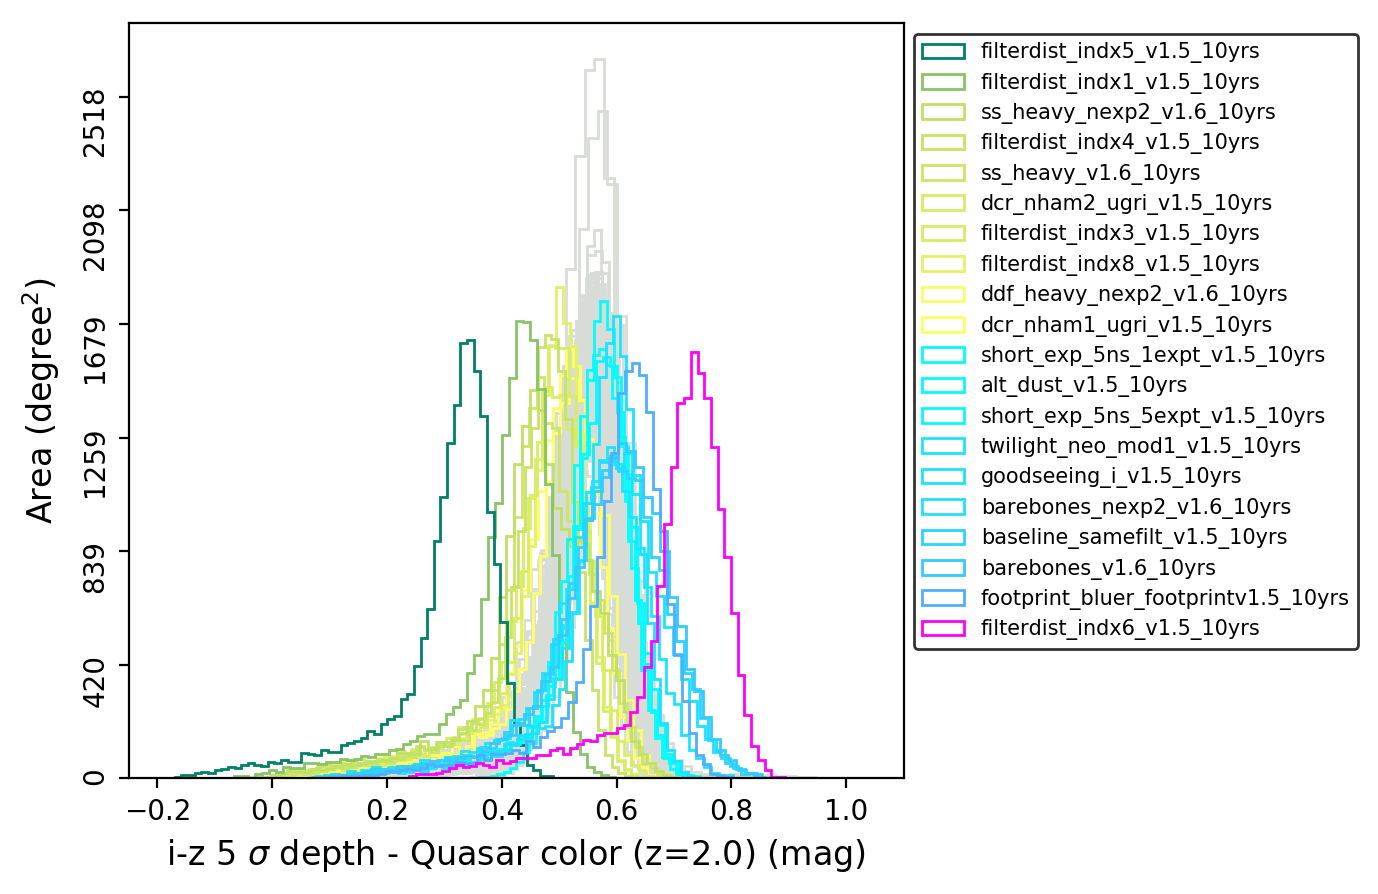

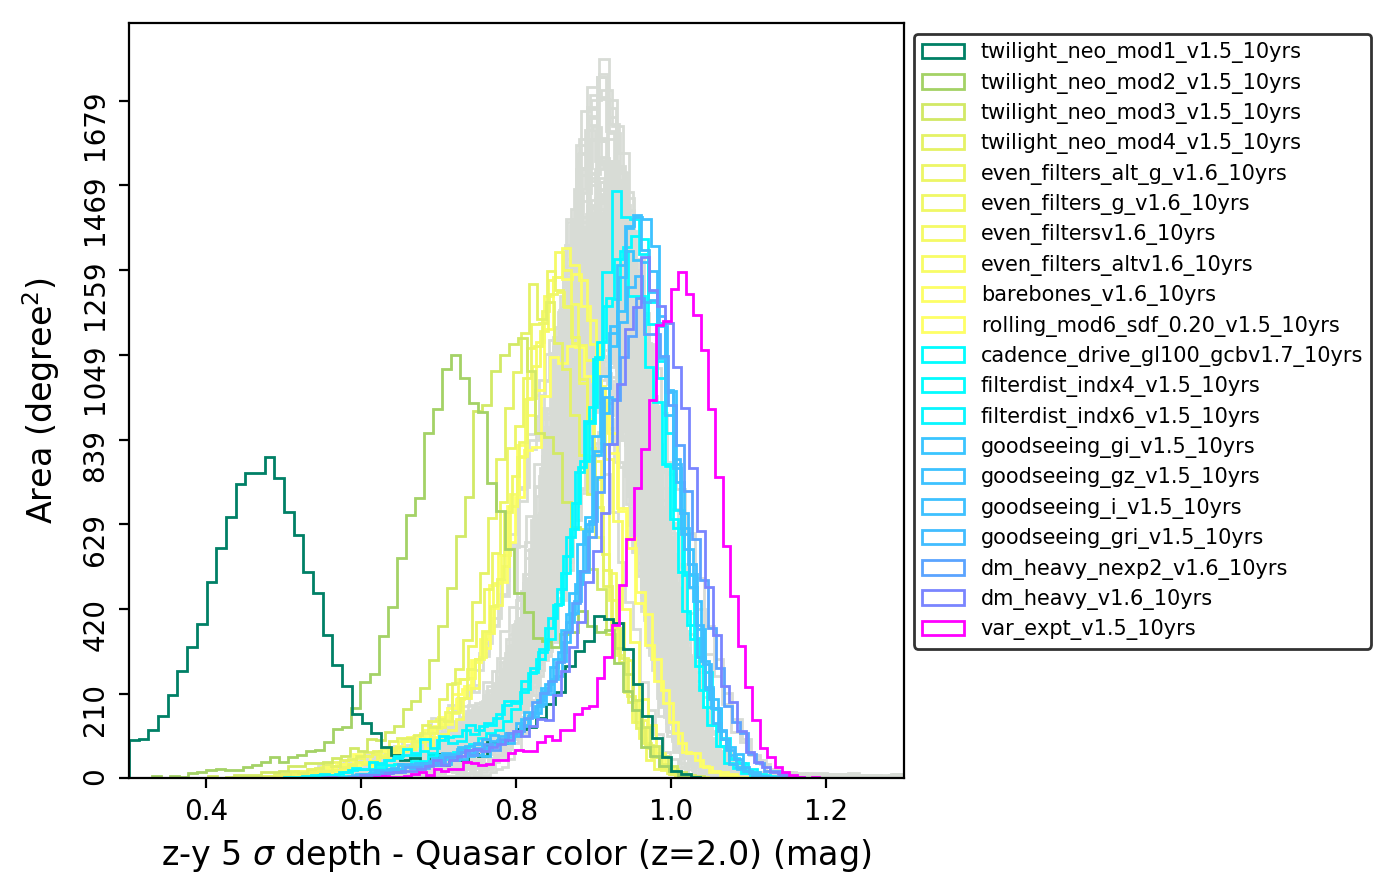

In [15]:
#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#X-axis ranges.
xmin = {'u-g':-2.2, 'g-r':-0.60, 'r-i':-0.20, 'i-z':-0.25, 'z-y': 0.30}
xmax = {'u-g':-0.3, 'g-r': 0.80, 'r-i': 1.10, 'i-z': 1.10, 'z-y': 1.30}

filters = ['u','g','r','i','z','y']
for k,filter in enumerate(filters[:-1]):
    Key = Keys[k]
    print(Key)
    color_name = '{0}-{1}'.format(filters[k],filters[k+1])
    
    #Function to process the matric data through.
    quasar_color = Assef10_colors(color_name,z)
    color_excess = lambda color : color-quasar_color

    #X-axis Label
    xlabel = r"{0} 5 $\sigma$ depth - Quasar color (z={1:.1f}) (mag)".format(color_name,z)
    
    #Plot all FBSs together.
    plot_OpSims_hist_extremes(Key, bundleDicts, data_func=color_excess, figsize=(5,5), 
                              healpix_pixarea=healpix_pixarea, datamin=xmin[color_name],
                              datamax=xmax[color_name], xlabel=xlabel, 
                              color_map_bottom=mpl.cm.summer, color_map_top=mpl.cm.cool,
                              percentile=5.0)
    #plot_OpSims_hist(Key, bundleDicts, data_func=color_excess, figsize=(10,11), healpix_pixarea=healpix_pixarea, 
    #                 datamin=xmin[color_name], datamax=xmax[color_name], color_map=[mpl.cm.summer,mpl.cm.cool], 
    #                 xlabel=xlabel)
    plot_fname = "{0}/Color_z{1}_{2}_Assef10.png".format(plots_folder,z,color_name)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')   

## Matthew Temple's AGN Color models

In [16]:
from quasar_colors.quasar_colors import Temple_colors

#### i=21.5

(1, 'Exgalm5_color_with_cuts_AGN_ug_mean')
filterdist_indx3_v1.5_10yrs -1.5451842215713043
u_long_ms_60_v1.7_10yrs -0.5836376413000205
(2, 'Exgalm5_color_with_cuts_AGN_gr_mean')
short_exp_5ns_1expt_v1.5_10yrs -0.2889405238355258
filterdist_indx1_v1.5_10yrs 0.38421057062555564
(3, 'Exgalm5_color_with_cuts_AGN_ri_mean')
filterdist_indx6_v1.5_10yrs 0.13743093196310022
footprint_bluer_footprintv1.5_10yrs 0.41372447875603546
(4, 'Exgalm5_color_with_cuts_AGN_iz_mean')
filterdist_indx5_v1.5_10yrs 0.28515265495772857
filterdist_indx6_v1.5_10yrs 0.6847529721955445
(5, 'Exgalm5_color_with_cuts_AGN_zy_mean')
twilight_neo_mod1_v1.5_10yrs 0.3864316155659313
var_expt_v1.5_10yrs 0.8831609618829368


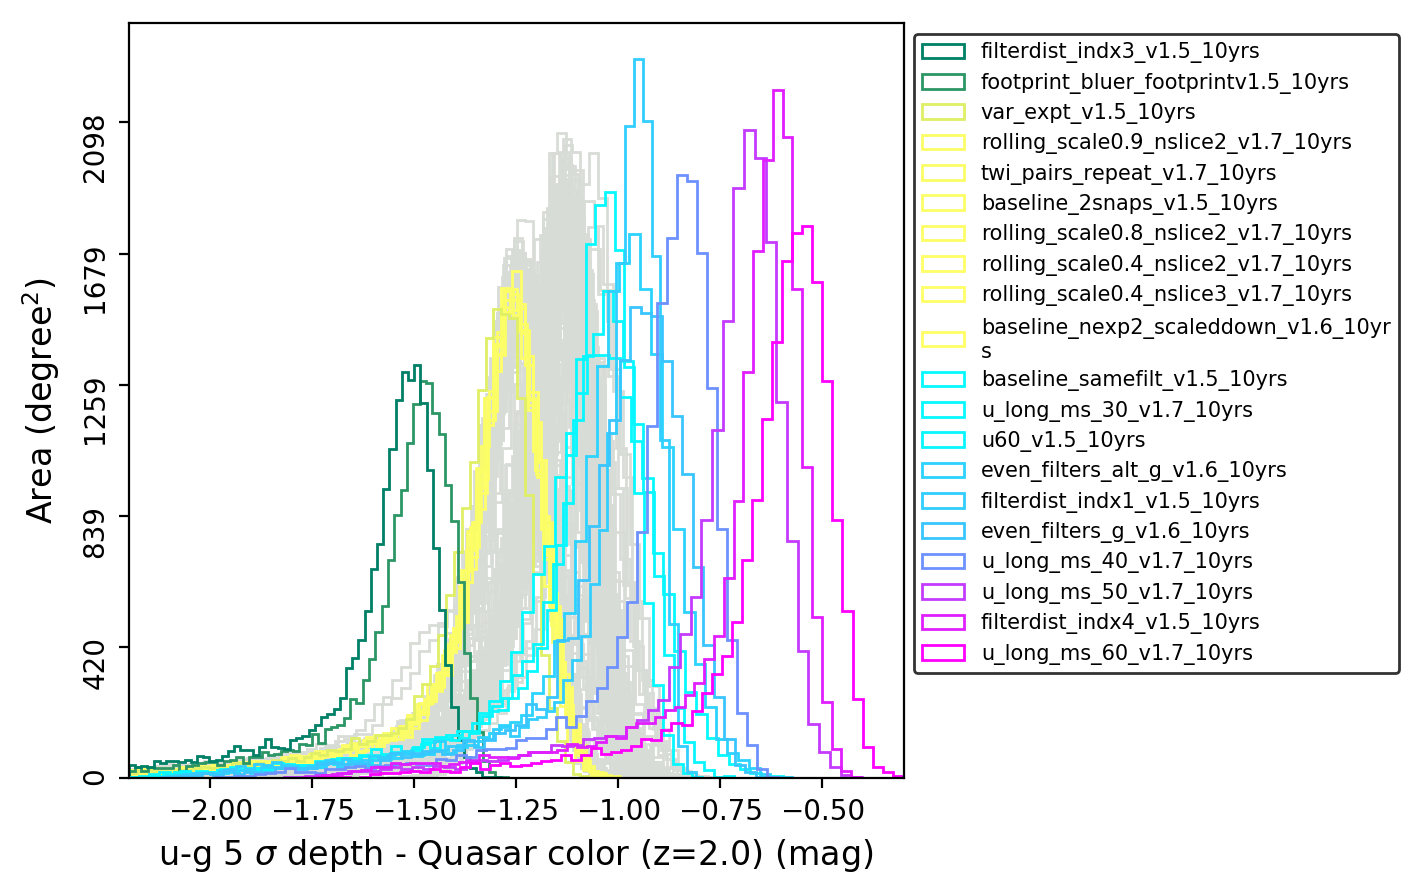

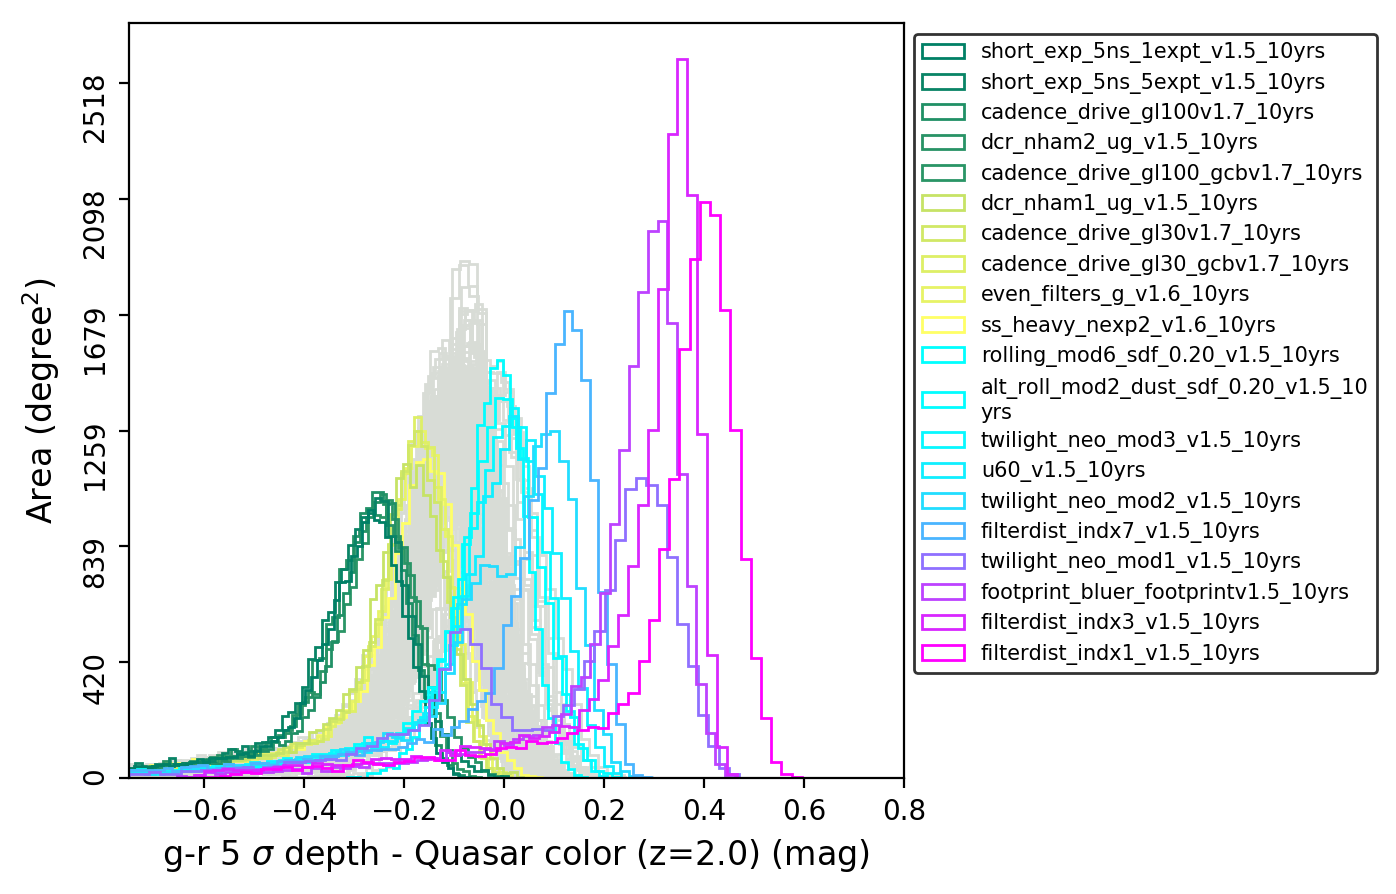

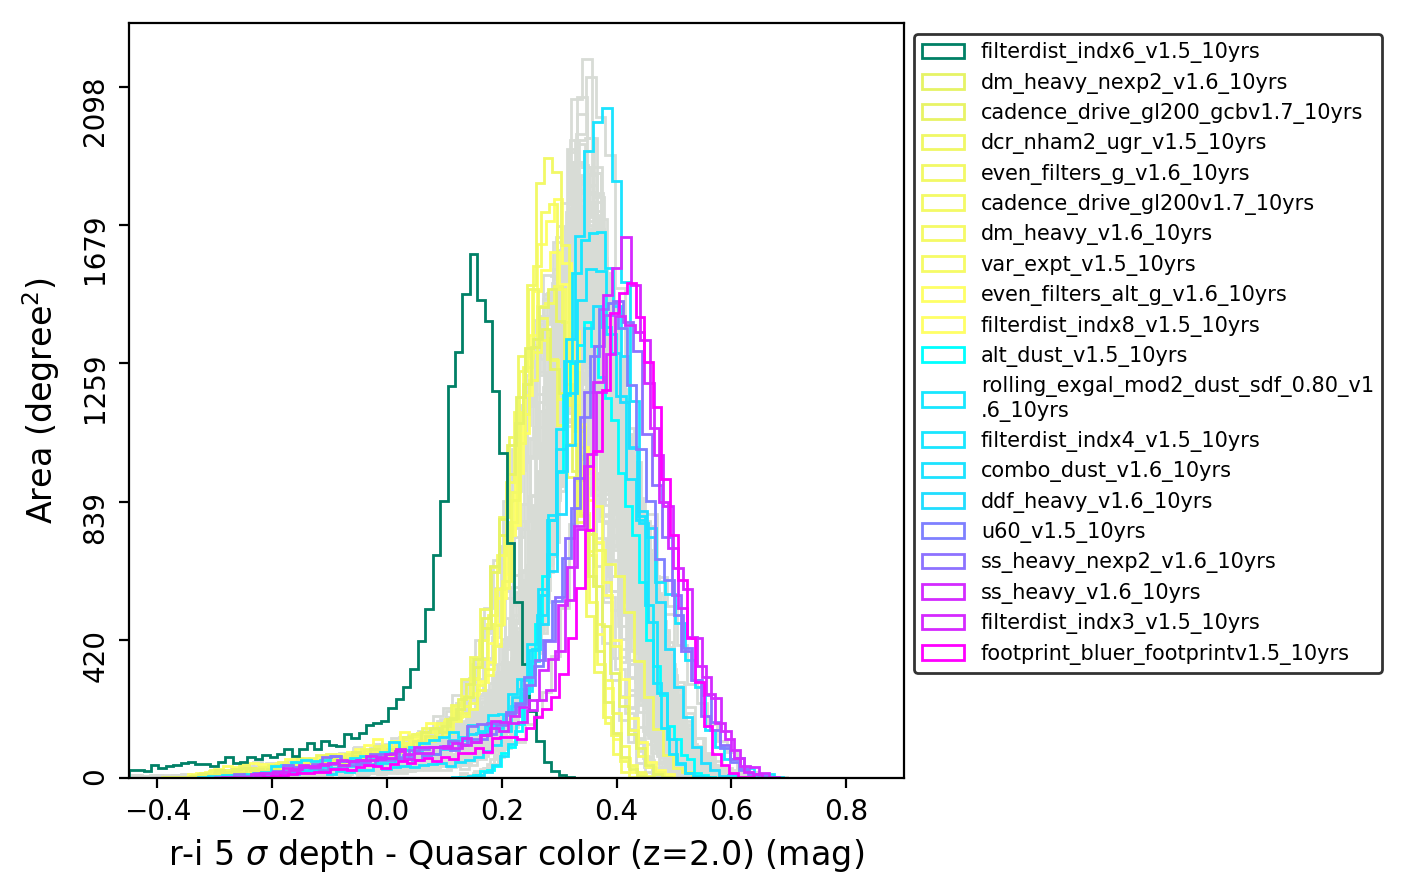

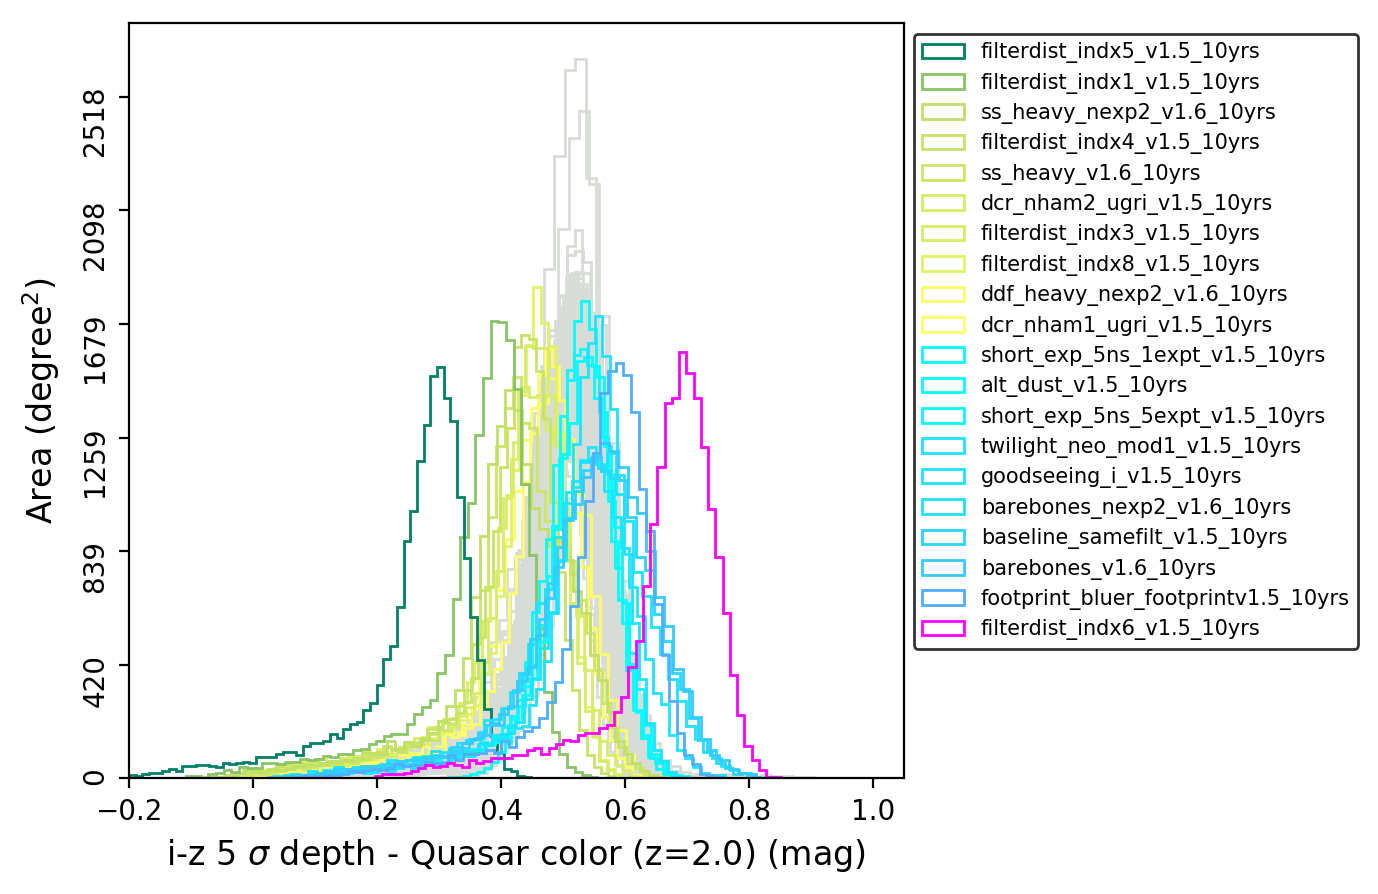

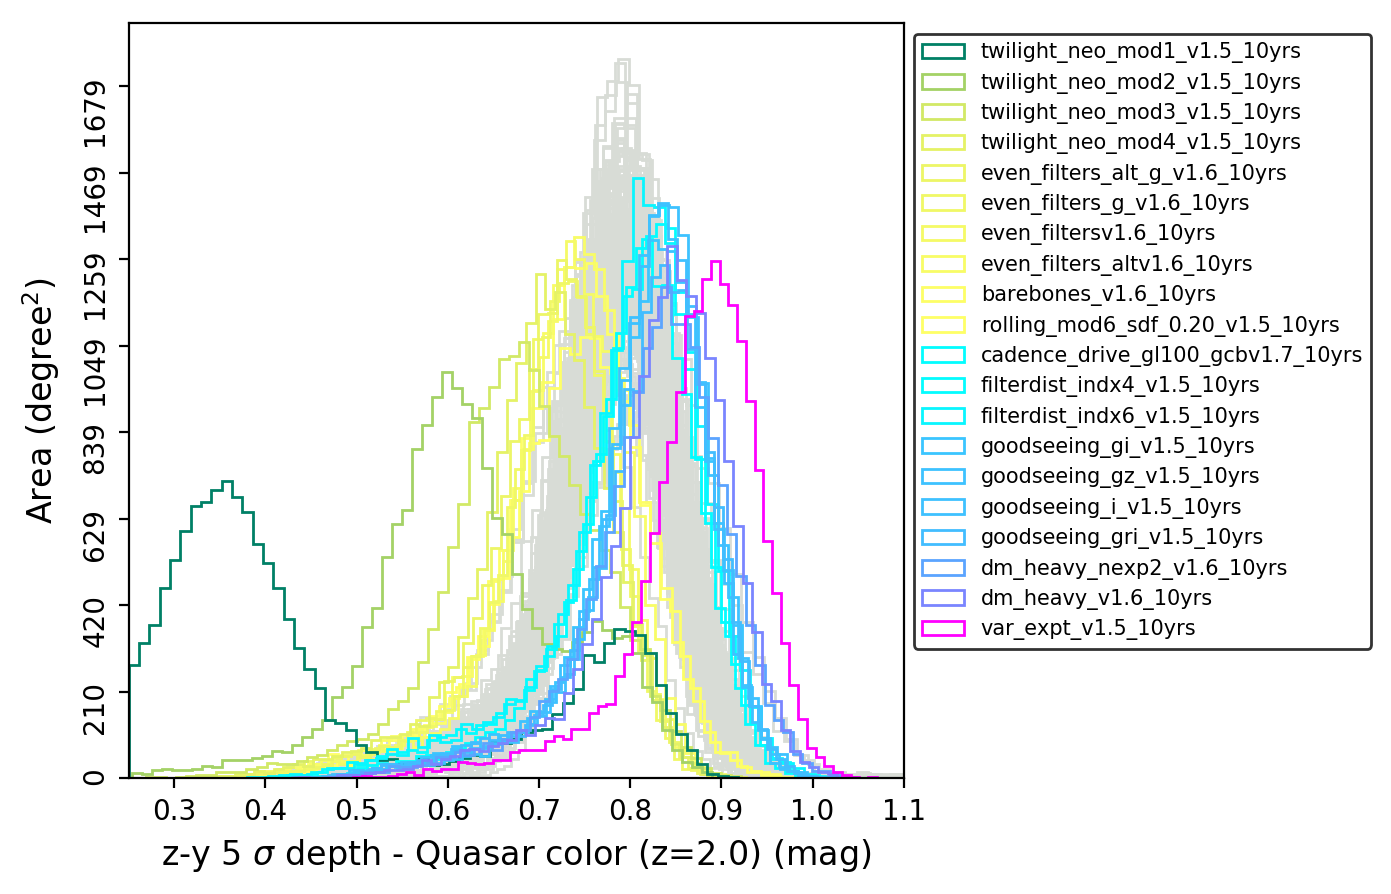

In [17]:
imag = 21.5

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#X-axis ranges.
xmin = {'u-g':-2.2, 'g-r':-0.75, 'r-i':-0.45, 'i-z':-0.20, 'z-y': 0.25}
xmax = {'u-g':-0.3, 'g-r': 0.80, 'r-i': 0.90, 'i-z': 1.05, 'z-y': 1.10}

filters = ['u','g','r','i','z','y']
for k,filter in enumerate(filters[:-1]):
    Key = Keys[k]
    print(Key)
    color_name = '{0}-{1}'.format(filters[k],filters[k+1])
    
    #Function to process the matric data through.
    quasar_color = Temple_colors(color_name,z,imag)
    color_excess = lambda color : color-quasar_color

    #X-axis Label
    xlabel = r"{0} 5 $\sigma$ depth - Quasar color (z={1:.1f}) (mag)".format(color_name,z)
    
    #Plot all FBSs together.
    plot_OpSims_hist_extremes(Key, bundleDicts, data_func=color_excess, figsize=(5,5), 
                              healpix_pixarea=healpix_pixarea, datamin=xmin[color_name],
                              datamax=xmax[color_name], xlabel=xlabel, 
                              color_map_bottom=mpl.cm.summer, color_map_top=mpl.cm.cool,
                              percentile=5.0)
    #plot_OpSims_hist(Key, bundleDicts, data_func=color_excess, figsize=(10,11), healpix_pixarea=healpix_pixarea, 
    #                 datamin=xmin[color_name], datamax=xmax[color_name], color_map=[mpl.cm.summer,mpl.cm.cool], 
    #                 xlabel=xlabel)
    plot_fname = "{0}/Color_z{1}_{2}_imag{3}_Temple.png".format(plots_folder,z,color_name,imag)
    plt.savefig(plot_fname, dpi=200) #, bbox_inches='tight')   

#### i=24.5

(1, 'Exgalm5_color_with_cuts_AGN_ug_mean')
filterdist_indx3_v1.5_10yrs -1.5217842215713042
u_long_ms_60_v1.7_10yrs -0.5602376413000205
(2, 'Exgalm5_color_with_cuts_AGN_gr_mean')
short_exp_5ns_1expt_v1.5_10yrs -0.2660405238355258
filterdist_indx1_v1.5_10yrs 0.40711057062555567
(3, 'Exgalm5_color_with_cuts_AGN_ri_mean')
filterdist_indx6_v1.5_10yrs 0.11093093196310022
footprint_bluer_footprintv1.5_10yrs 0.3872244787560355
(4, 'Exgalm5_color_with_cuts_AGN_iz_mean')
filterdist_indx5_v1.5_10yrs 0.2693526549577286
filterdist_indx6_v1.5_10yrs 0.6689529721955445
(5, 'Exgalm5_color_with_cuts_AGN_zy_mean')
twilight_neo_mod1_v1.5_10yrs 0.37103161556593134
var_expt_v1.5_10yrs 0.8677609618829368


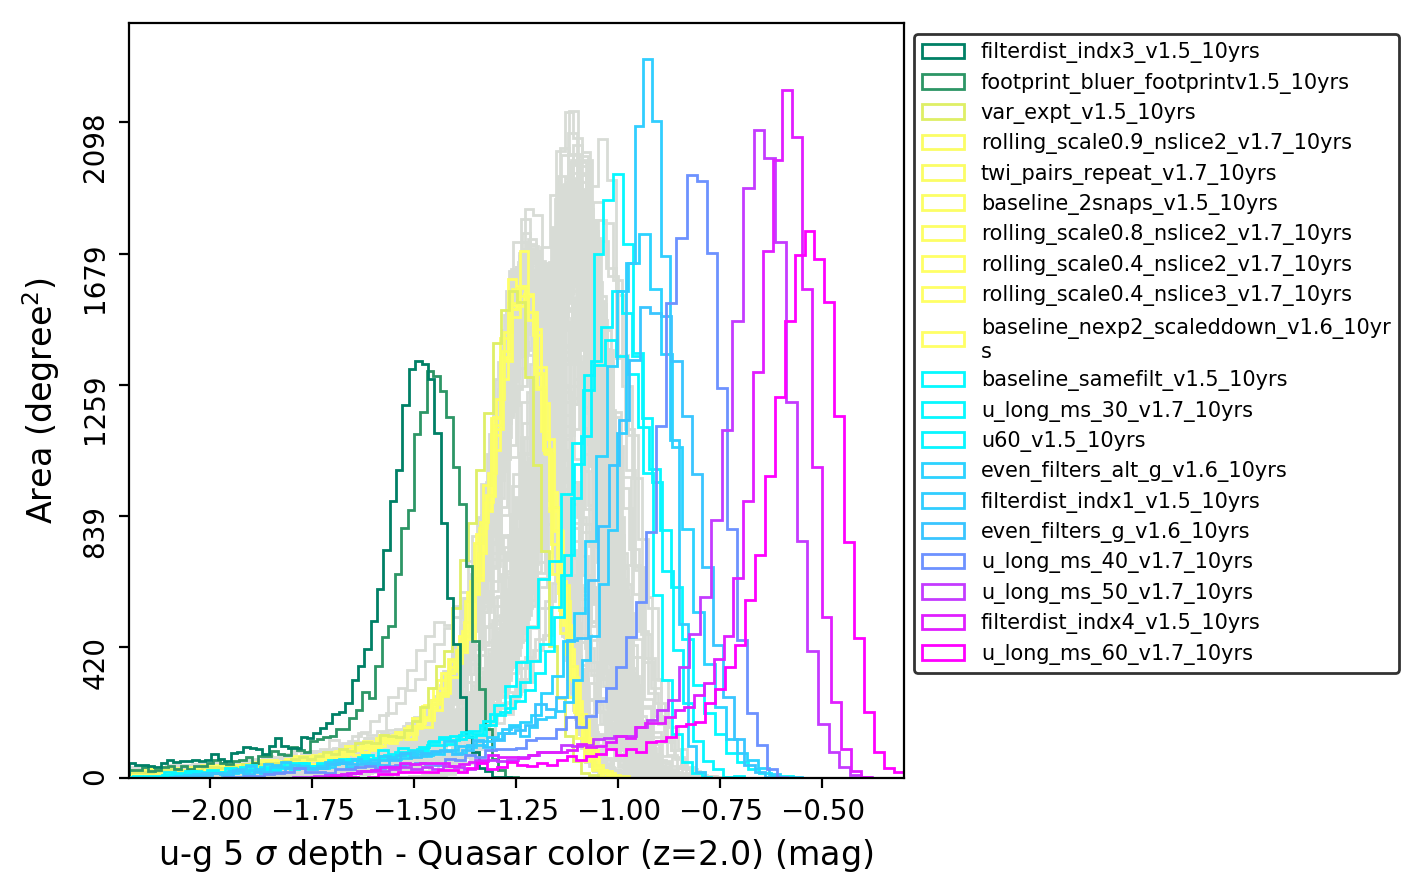

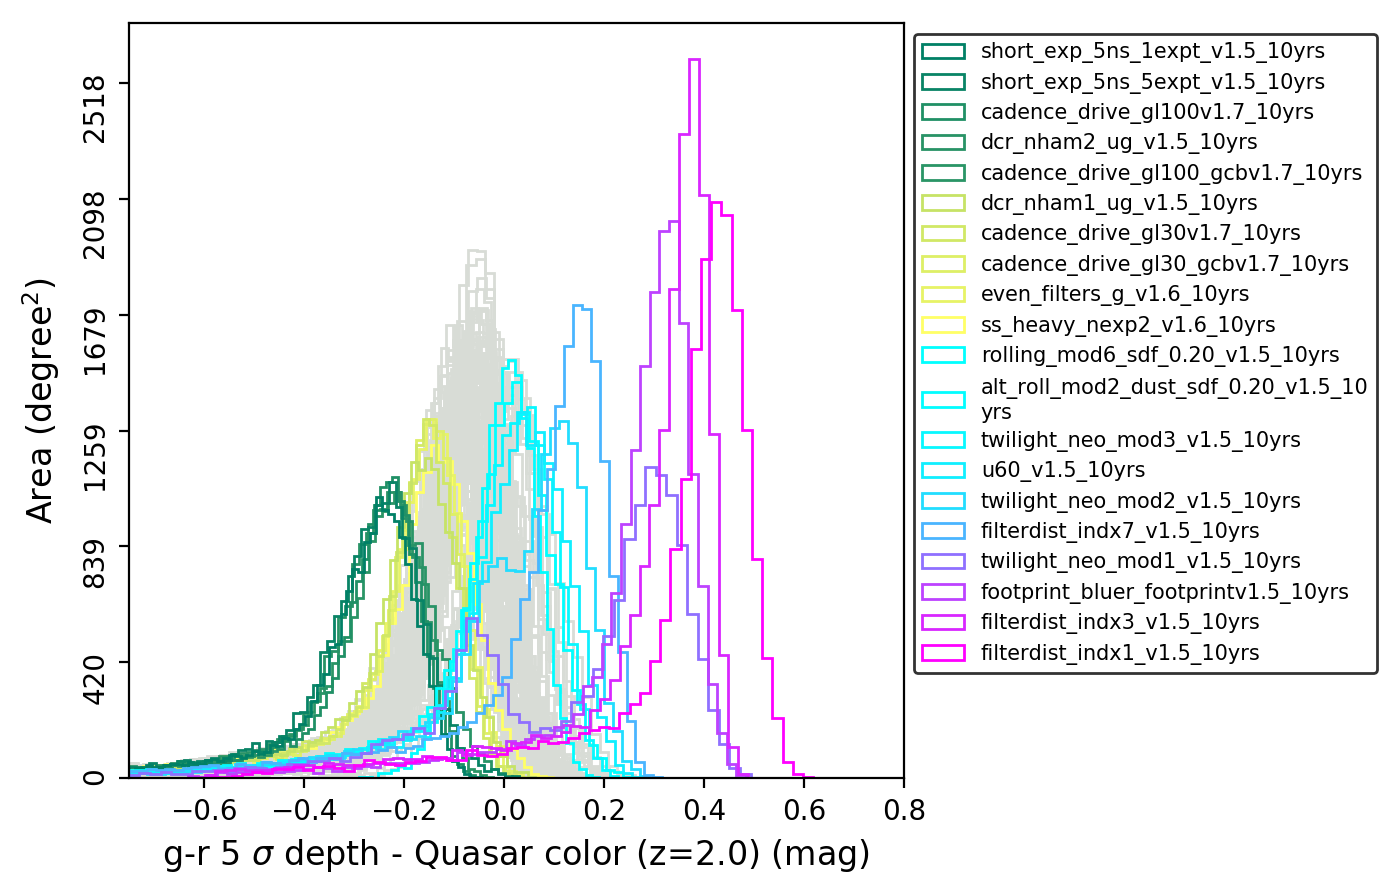

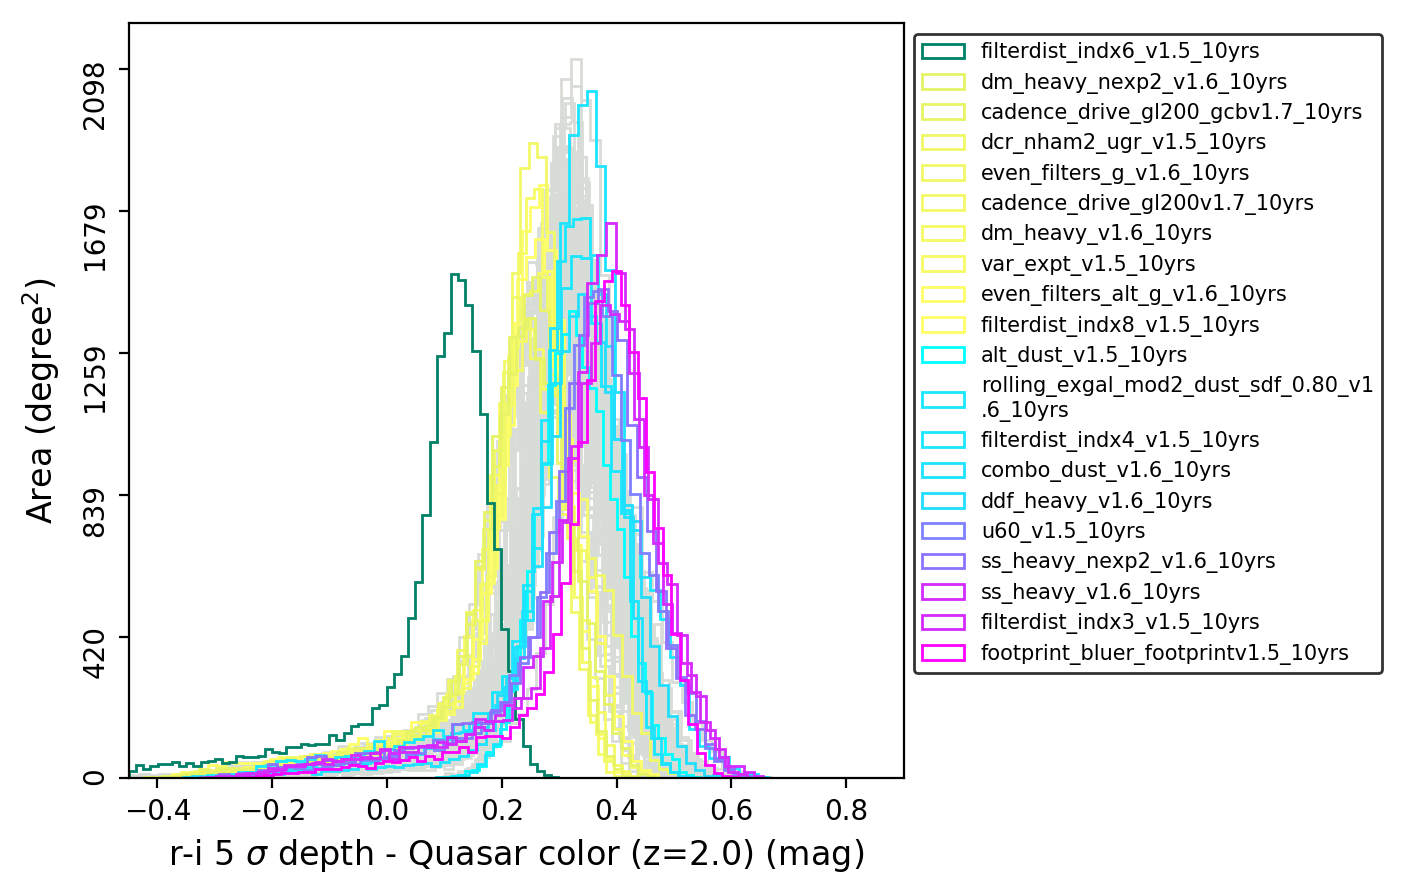

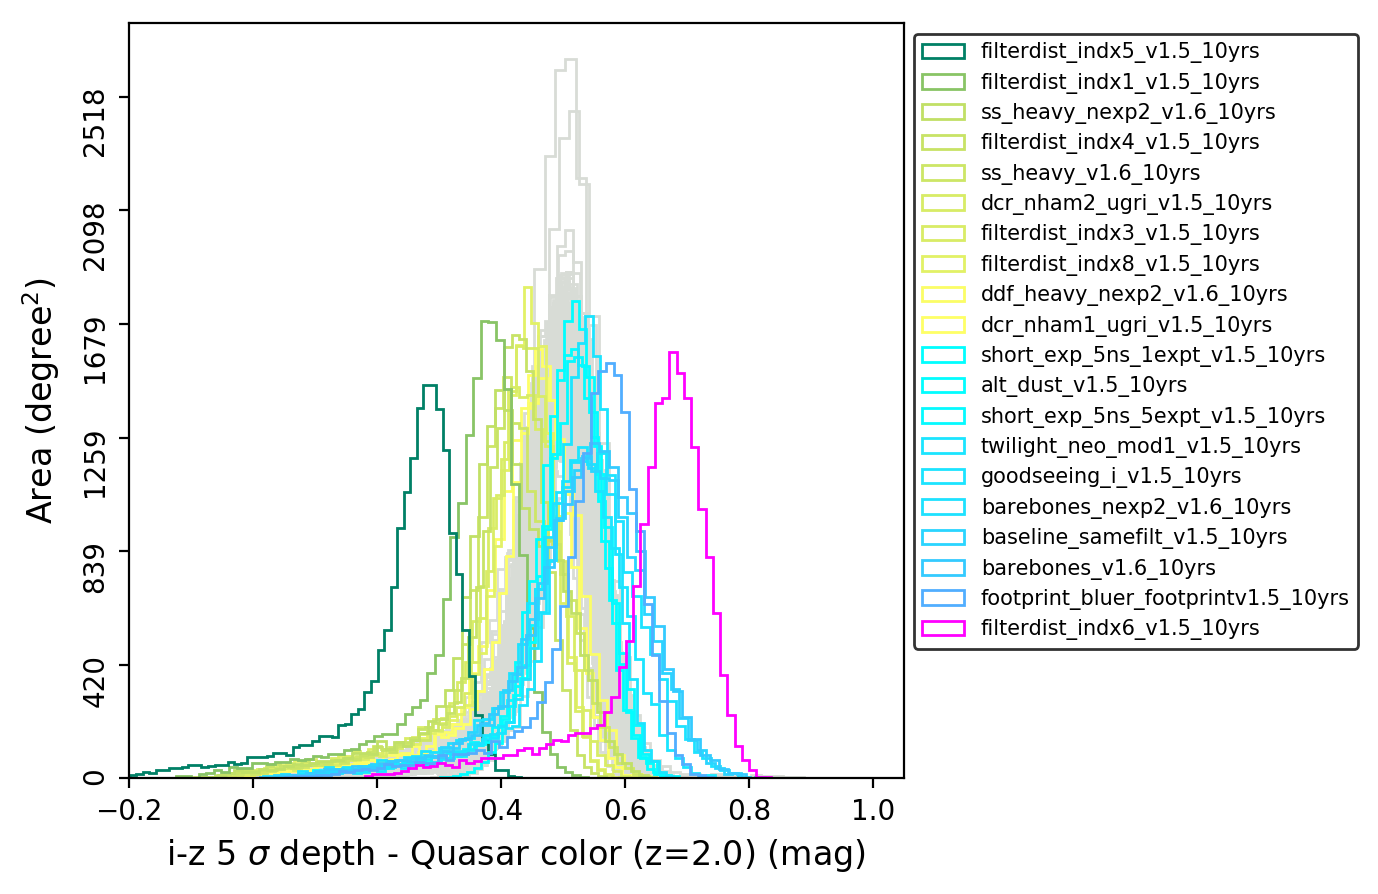

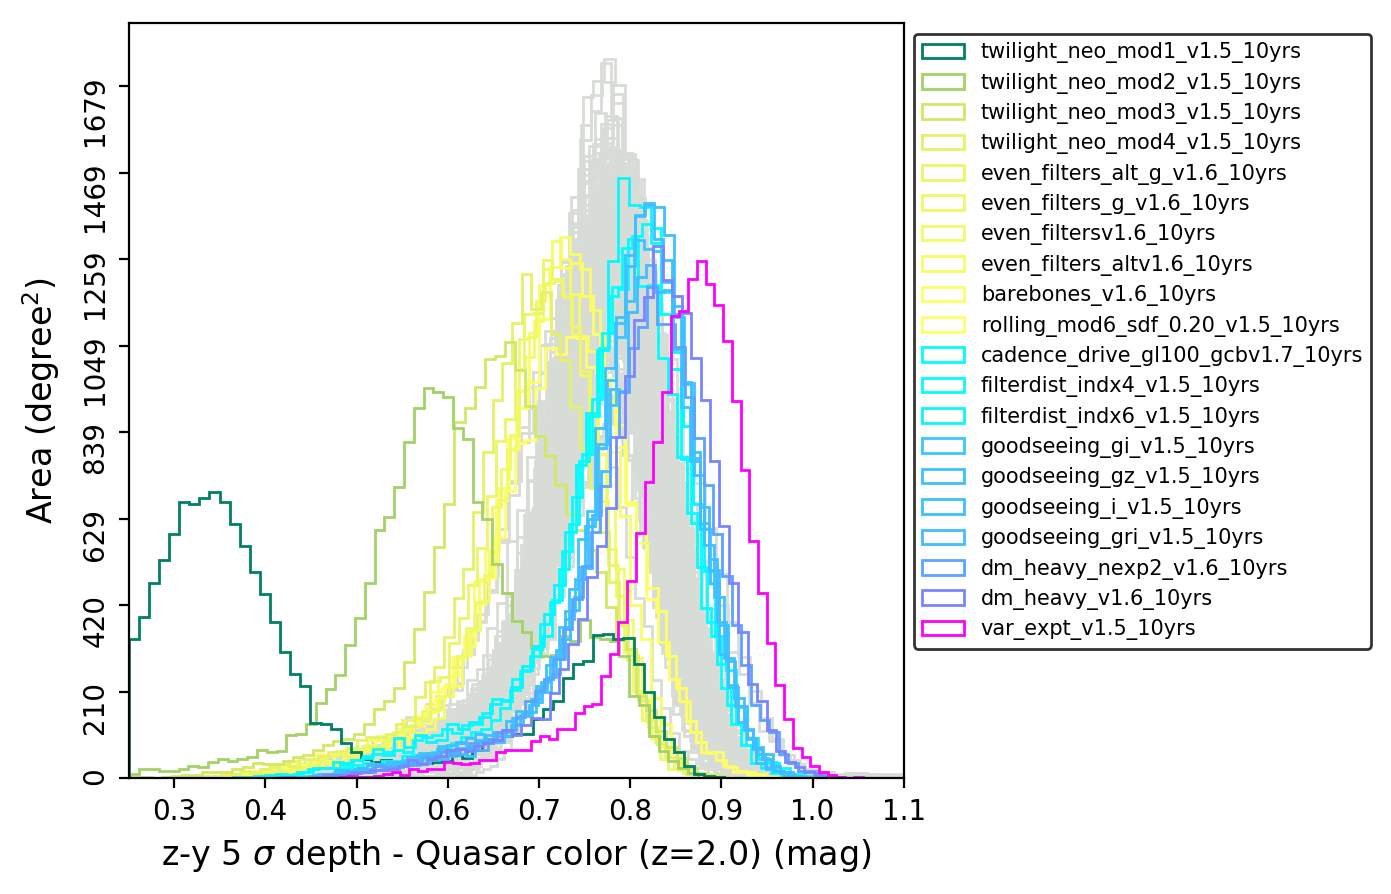

In [18]:
imag = 24.5

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#X-axis ranges.
xmin = {'u-g':-2.2, 'g-r':-0.75, 'r-i':-0.45, 'i-z':-0.20, 'z-y': 0.25}
xmax = {'u-g':-0.3, 'g-r': 0.80, 'r-i': 0.90, 'i-z': 1.05, 'z-y': 1.10}

filters = ['u','g','r','i','z','y']
for k,filter in enumerate(filters[:-1]):
    Key = Keys[k]
    print(Key)
    color_name = '{0}-{1}'.format(filters[k],filters[k+1])
    
    #Function to process the matric data through.
    quasar_color = Temple_colors(color_name,z,imag)
    color_excess = lambda color : color-quasar_color

    #X-axis Label
    xlabel = r"{0} 5 $\sigma$ depth - Quasar color (z={1:.1f}) (mag)".format(color_name,z)
    
    #Plot all FBSs together.
    plot_OpSims_hist_extremes(Key, bundleDicts, data_func=color_excess, figsize=(5,5), 
                              healpix_pixarea=healpix_pixarea, datamin=xmin[color_name],
                              datamax=xmax[color_name], xlabel=xlabel, 
                              color_map_bottom=mpl.cm.summer, color_map_top=mpl.cm.cool,
                              percentile=5.0)
    #plot_OpSims_hist(Key, bundleDicts, data_func=color_excess, figsize=(10,11), healpix_pixarea=healpix_pixarea, 
    #                 datamin=xmin[color_name], datamax=xmax[color_name], color_map=[mpl.cm.summer,mpl.cm.cool], 
    #                 xlabel=xlabel)
    plot_fname = "{0}/Color_z{1}_{2}_imag{3}_Temple.png".format(plots_folder,z,color_name,imag)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')   

#### i=26.0

(1, 'Exgalm5_color_with_cuts_AGN_ug_mean')
filterdist_indx3_v1.5_10yrs -1.5124842215713041
u_long_ms_60_v1.7_10yrs -0.5509376413000205
(2, 'Exgalm5_color_with_cuts_AGN_gr_mean')
short_exp_5ns_1expt_v1.5_10yrs -0.25664052383552577
filterdist_indx1_v1.5_10yrs 0.4165105706255557
(3, 'Exgalm5_color_with_cuts_AGN_ri_mean')
filterdist_indx6_v1.5_10yrs 0.0997309319631002
footprint_bluer_footprintv1.5_10yrs 0.3760244787560355
(4, 'Exgalm5_color_with_cuts_AGN_iz_mean')
filterdist_indx5_v1.5_10yrs 0.26215265495772855
filterdist_indx6_v1.5_10yrs 0.6617529721955445
(5, 'Exgalm5_color_with_cuts_AGN_zy_mean')
twilight_neo_mod1_v1.5_10yrs 0.3627316155659313
var_expt_v1.5_10yrs 0.8594609618829369


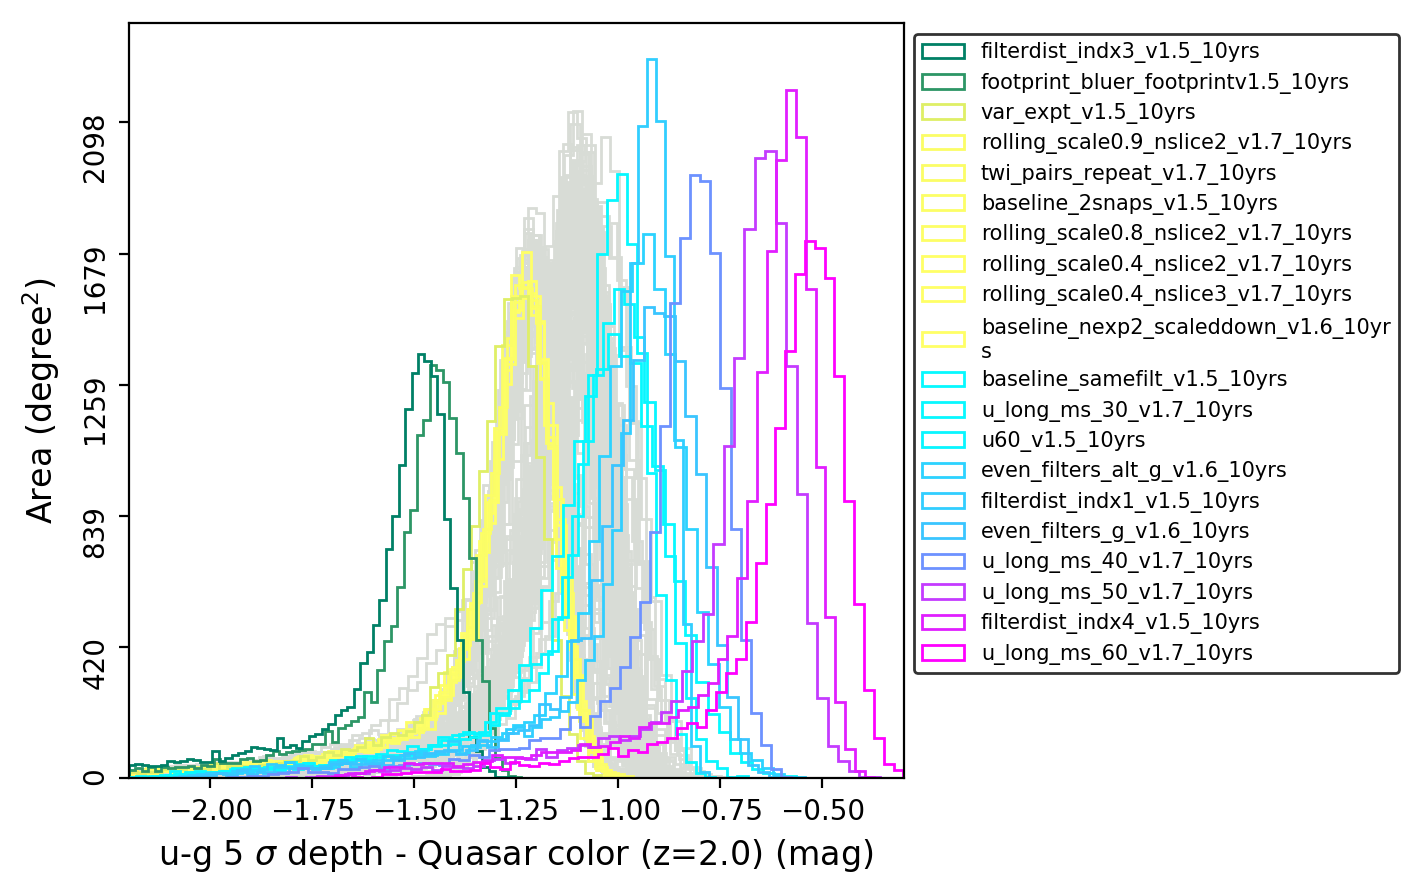

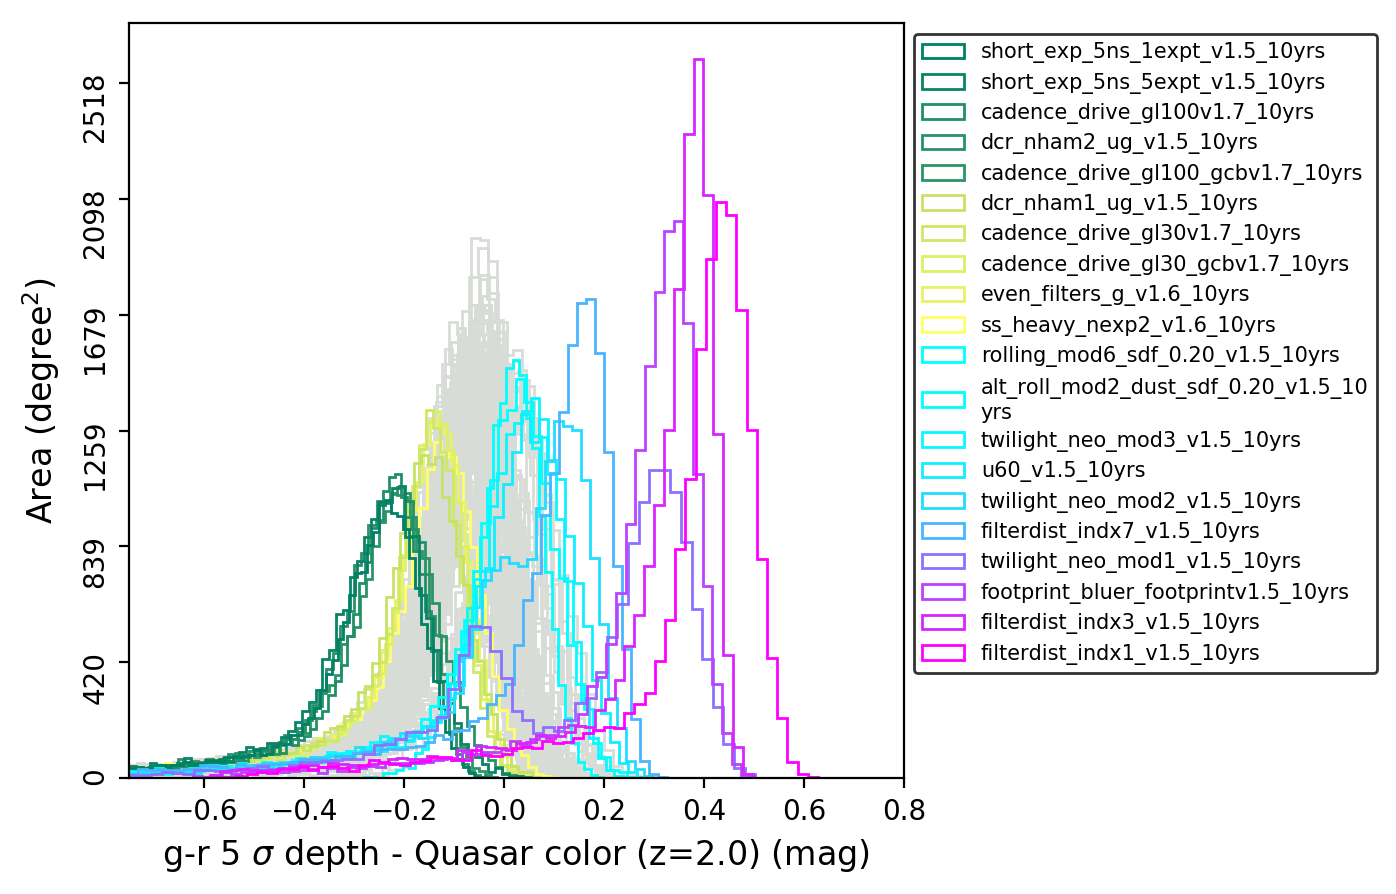

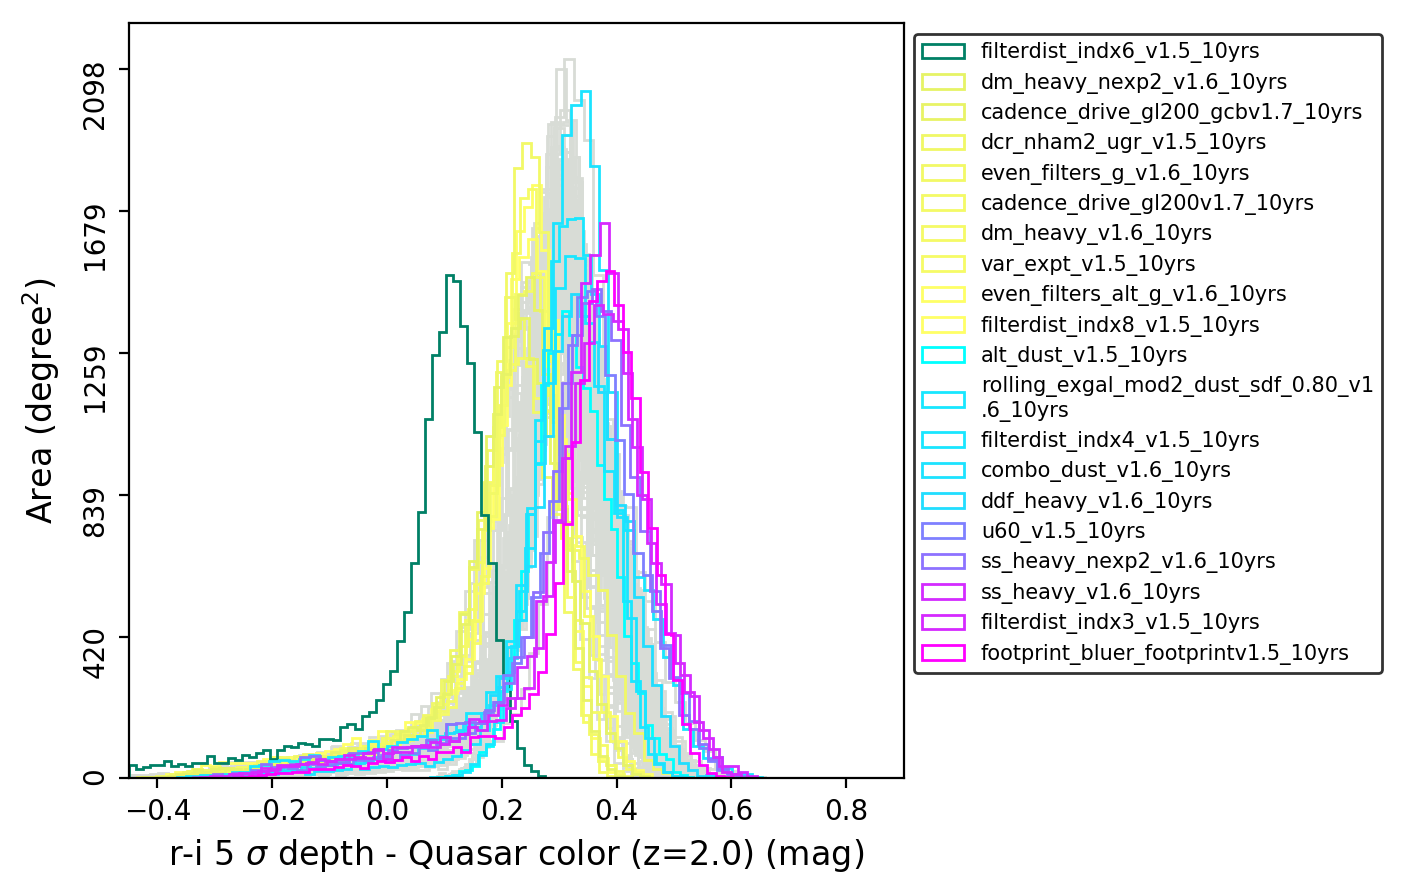

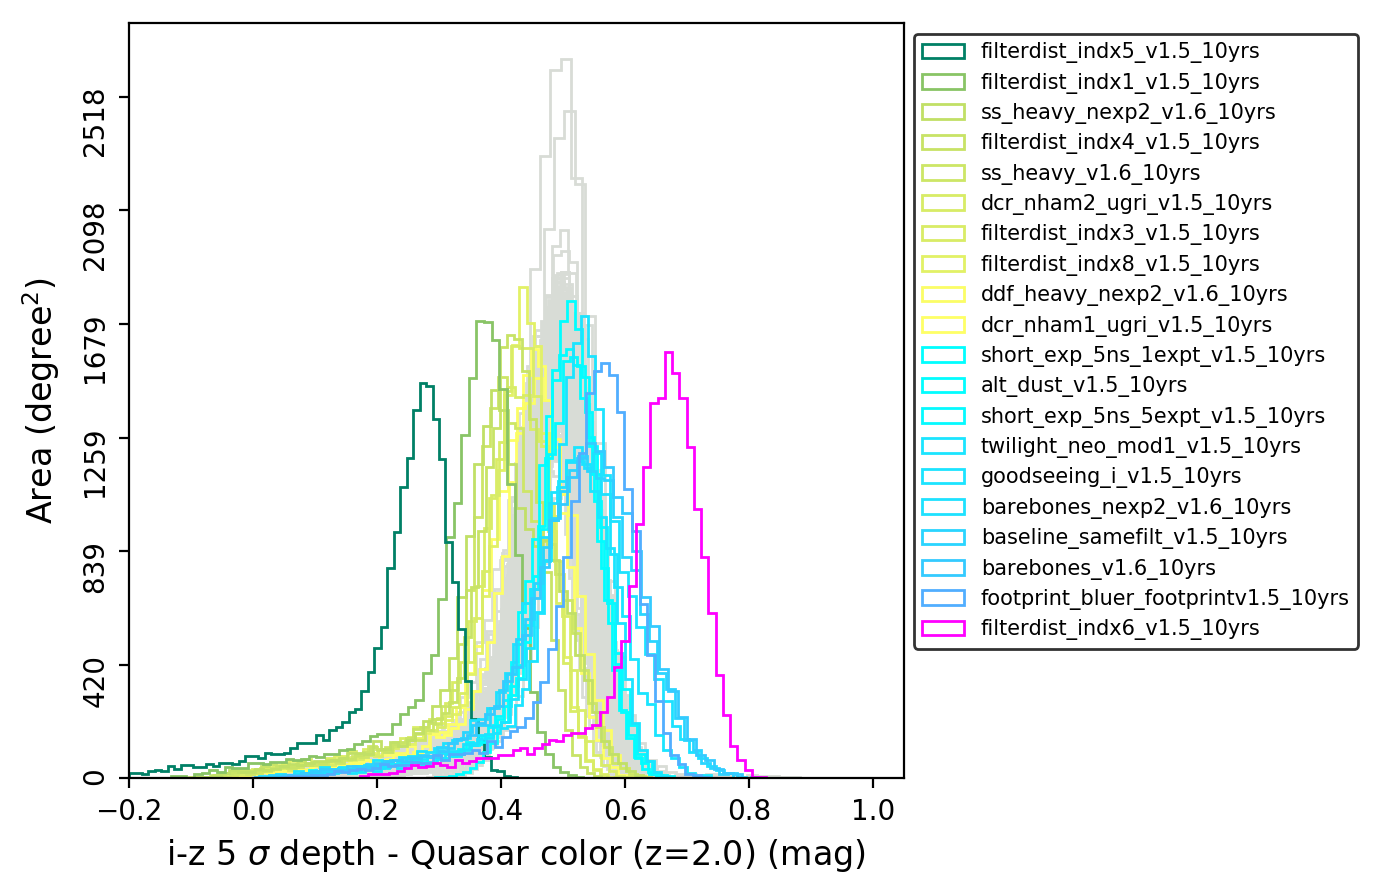

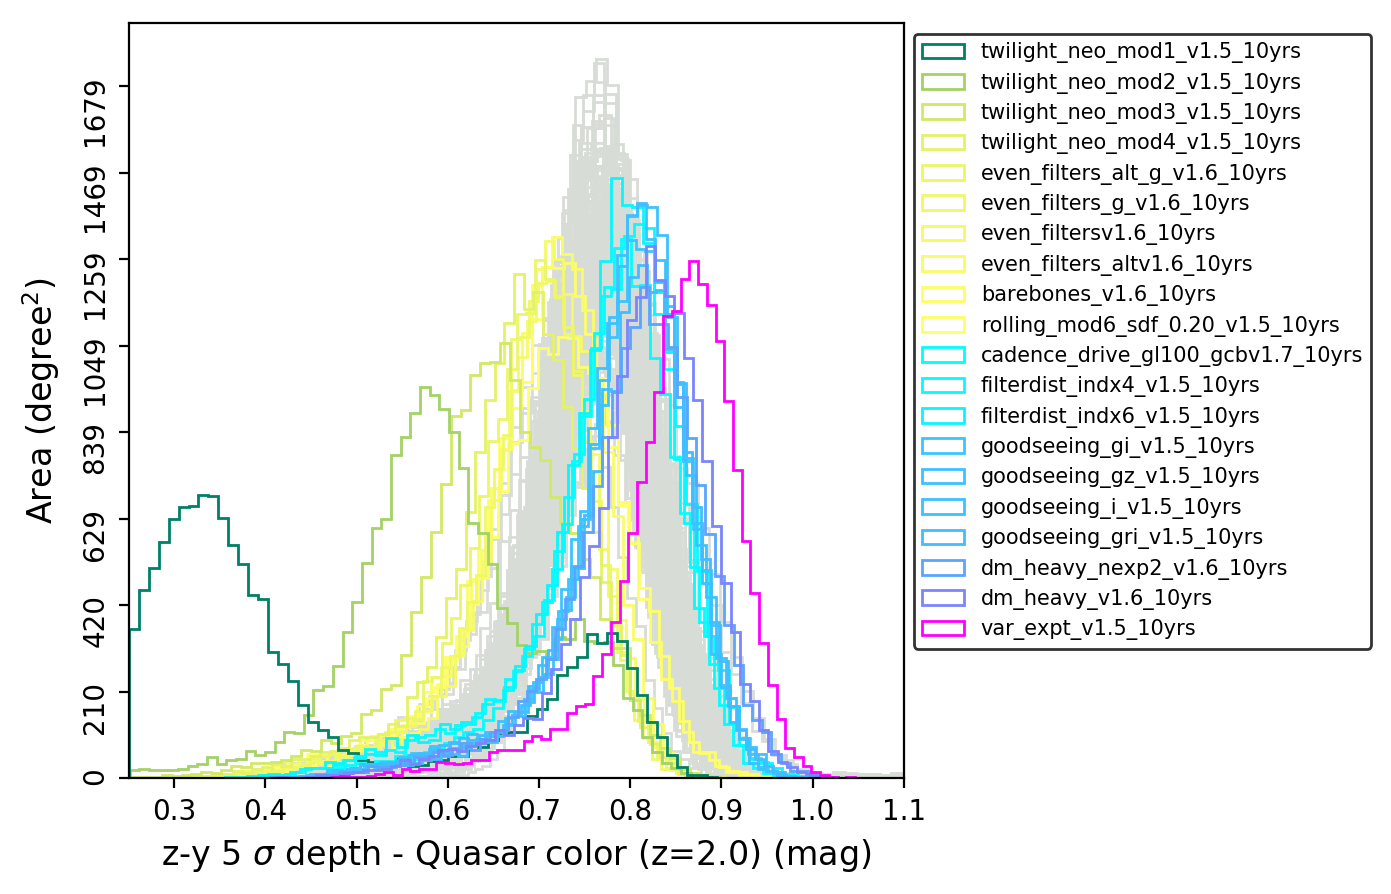

In [19]:
imag = 26.0

#Area of each element
healpix_pixarea = bundleDicts[dbRuns[0]][Key].slicer.pixArea * u.sr

#X-axis ranges.
xmin = {'u-g':-2.2, 'g-r':-0.75, 'r-i':-0.45, 'i-z':-0.20, 'z-y': 0.25}
xmax = {'u-g':-0.3, 'g-r': 0.80, 'r-i': 0.90, 'i-z': 1.05, 'z-y': 1.10}

filters = ['u','g','r','i','z','y']
for k,filter in enumerate(filters[:-1]):
    Key = Keys[k]
    print(Key)
    color_name = '{0}-{1}'.format(filters[k],filters[k+1])
    
    #Function to process the matric data through.
    quasar_color = Temple_colors(color_name,z,imag)
    color_excess = lambda color : color-quasar_color

    #X-axis Label
    xlabel = r"{0} 5 $\sigma$ depth - Quasar color (z={1:.1f}) (mag)".format(color_name,z)
    
    #Plot all FBSs together.
    plot_OpSims_hist_extremes(Key, bundleDicts, data_func=color_excess, figsize=(5,5), 
                              healpix_pixarea=healpix_pixarea, datamin=xmin[color_name],
                              datamax=xmax[color_name], xlabel=xlabel, 
                              color_map_bottom=mpl.cm.summer, color_map_top=mpl.cm.cool,
                              percentile=5.0)
    #plot_OpSims_hist(Key, bundleDicts, data_func=color_excess, figsize=(10,11), healpix_pixarea=healpix_pixarea, 
    #                 datamin=xmin[color_name], datamax=xmax[color_name], color_map=[mpl.cm.summer,mpl.cm.cool], 
    #                 xlabel=xlabel)
    plot_fname = "{0}/Color_z{1}_{2}_imag{3}_Temple.png".format(plots_folder,z,color_name,imag)
    plt.savefig(plot_fname, dpi=200, bbox_inches='tight')   